# **Импортируем библиотеки**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import pylab

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.model_selection import StratifiedKFold

from math import ceil

import json

from kaggle.api.kaggle_api_extended import KaggleApi

import warnings
warnings.filterwarnings("ignore")

# **Грузим данные**

## **Добавим Kaggle.json**

In [ ]:
# !mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"neckofnickey","key":"92704357f9346b0f5402a66777dc141a"}

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json


### **Находим и грузим данные**

In [ ]:
!kaggle datasets list -s 'Iris Flower'

ref                                                          title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arshid/iris-flower-dataset                                   Iris Flower Dataset                              1010B  2018-03-22 15:18:06          93594        631  0.8235294        
uciml/iris                                                   Iris Species                                       4KB  2016-09-27 07:38:05         387057       3290  0.7941176        
himanshunakrani/iris-dataset                                 iris dataset                                     1006B  2022-07-20 18:50:06           3054         40  1.0              
sims22/irisflowerdatasets                                    IRIS-FLOWER-DATASETS         

In [ ]:
api = KaggleApi()
api.authenticate()
api.dataset_download_files("arshid/iris-flower-dataset", path='Data', unzip=True)

In [ ]:
iris_data = pd.read_csv('Data/IRIS.csv', encoding='utf-8')

# **Предобработка**

In [ ]:
iris_data_cln = iris_data.copy(deep=True)

## **Приводим в нижний регистр**

In [ ]:
iris_data_cln['species'] = iris_data_cln['species'].str.lower()

## **Заменяем значения в столбцах**

In [ ]:
iris_data_cln.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa


## **Визуализация 1**

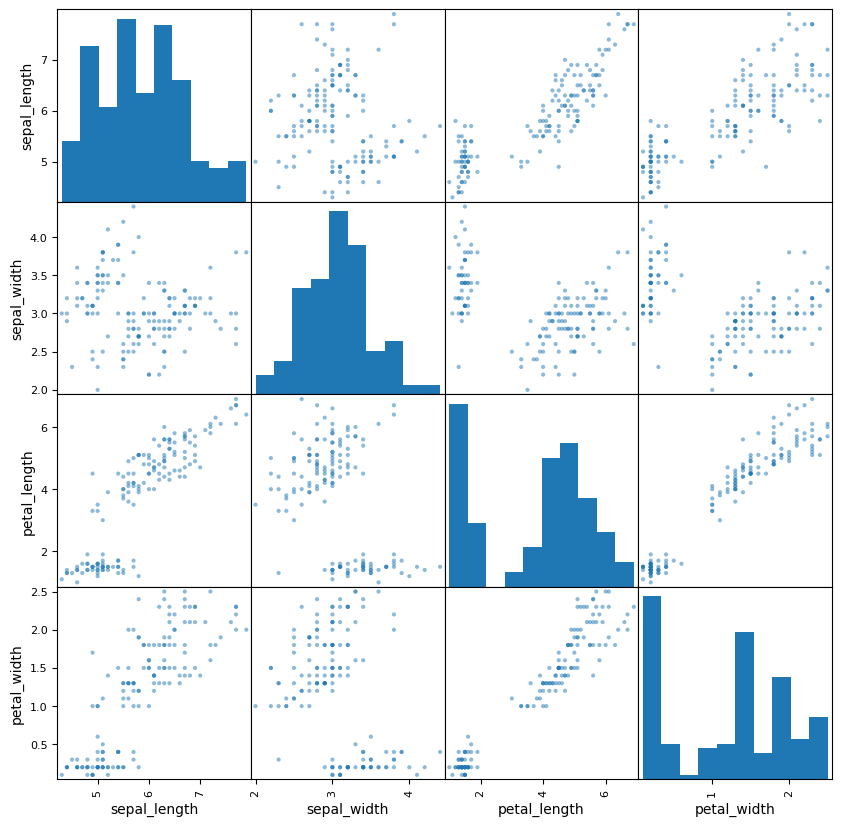

In [ ]:
scatter_matrix(iris_data_cln, figsize=(10, 10))
plt.show()

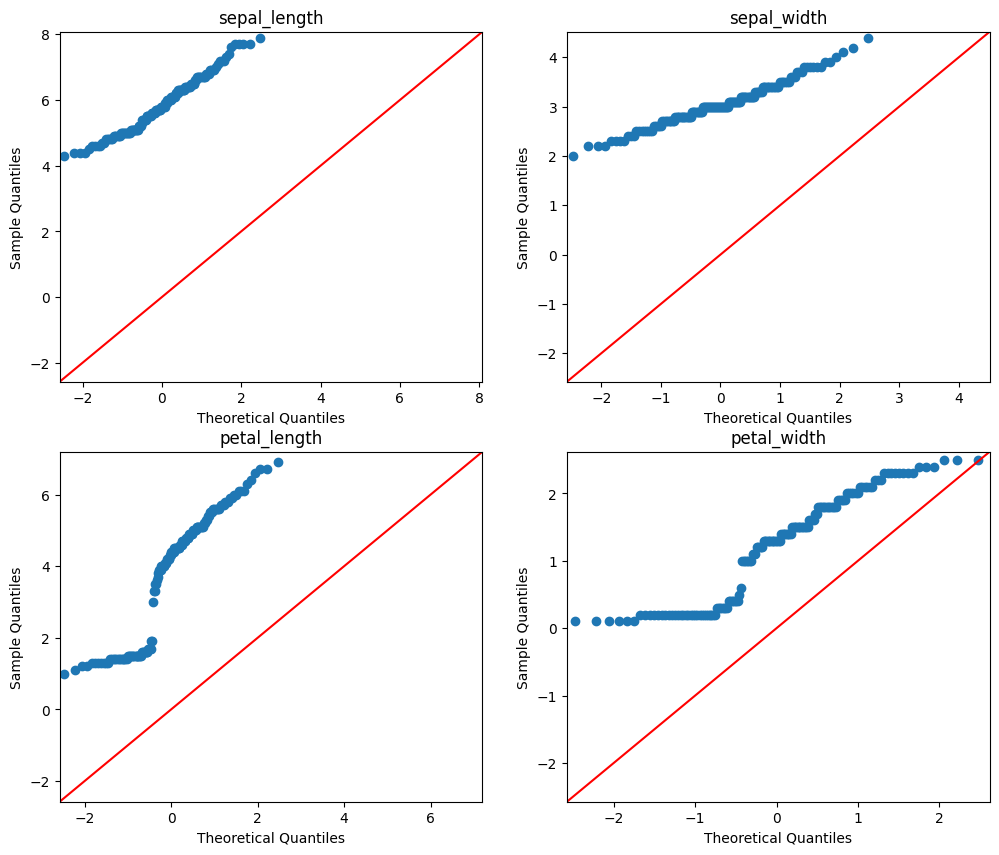

In [ ]:
fig = plt.figure(figsize=(12, 10))

left = -1.8

columns = iris_data_cln.select_dtypes(include=np.number).columns

for index, col in enumerate(columns, start=1):
  ax = fig.add_subplot(2, 2, index)
  sm.graphics.qqplot(iris_data_cln[col], line='45', ax=ax)
  ax.set_title(col)

## **Отделяем целевую переменную**

In [ ]:
Y = iris_data_cln['species'].to_frame()
X = iris_data_cln.drop('species', axis=1)

## **Нормализация**

In [ ]:
scaler = MinMaxScaler()

scaler_X = scaler.fit_transform(X)

X_norm = pd.DataFrame(scaler_X,
                      columns=X.columns)

X_norm.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


## **Добавляем признаков**

In [ ]:
cols = X_norm.columns

for index, col_name_1 in enumerate(cols):
  for col_name_2 in cols[index:]:
    name = col_name_1+'*'+col_name_2
    X_norm[name] = X_norm[col_name_1]*X_norm[col_name_2]

In [ ]:
X_norm.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length*sepal_length,sepal_length*sepal_width,sepal_length*petal_length,sepal_length*petal_width,sepal_width*sepal_width,sepal_width*petal_length,sepal_width*petal_width,petal_length*petal_length,petal_length*petal_width,petal_width*petal_width
0,0.222222,0.625000,0.067797,0.041667,0.049383,0.138889,0.015066,0.009259,0.390625,0.042373,0.026042,0.004596,0.002825,0.001736
1,0.166667,0.416667,0.067797,0.041667,0.027778,0.069444,0.011299,0.006944,0.173611,0.028249,0.017361,0.004596,0.002825,0.001736
2,0.111111,0.500000,0.050847,0.041667,0.012346,0.055556,0.005650,0.004630,0.250000,0.025424,0.020833,0.002585,0.002119,0.001736
3,0.083333,0.458333,0.084746,0.041667,0.006944,0.038194,0.007062,0.003472,0.210069,0.038842,0.019097,0.007182,0.003531,0.001736
4,0.194444,0.666667,0.067797,0.041667,0.037809,0.129630,0.013183,0.008102,0.444444,0.045198,0.027778,0.004596,0.002825,0.001736


## **Визуализация 2**

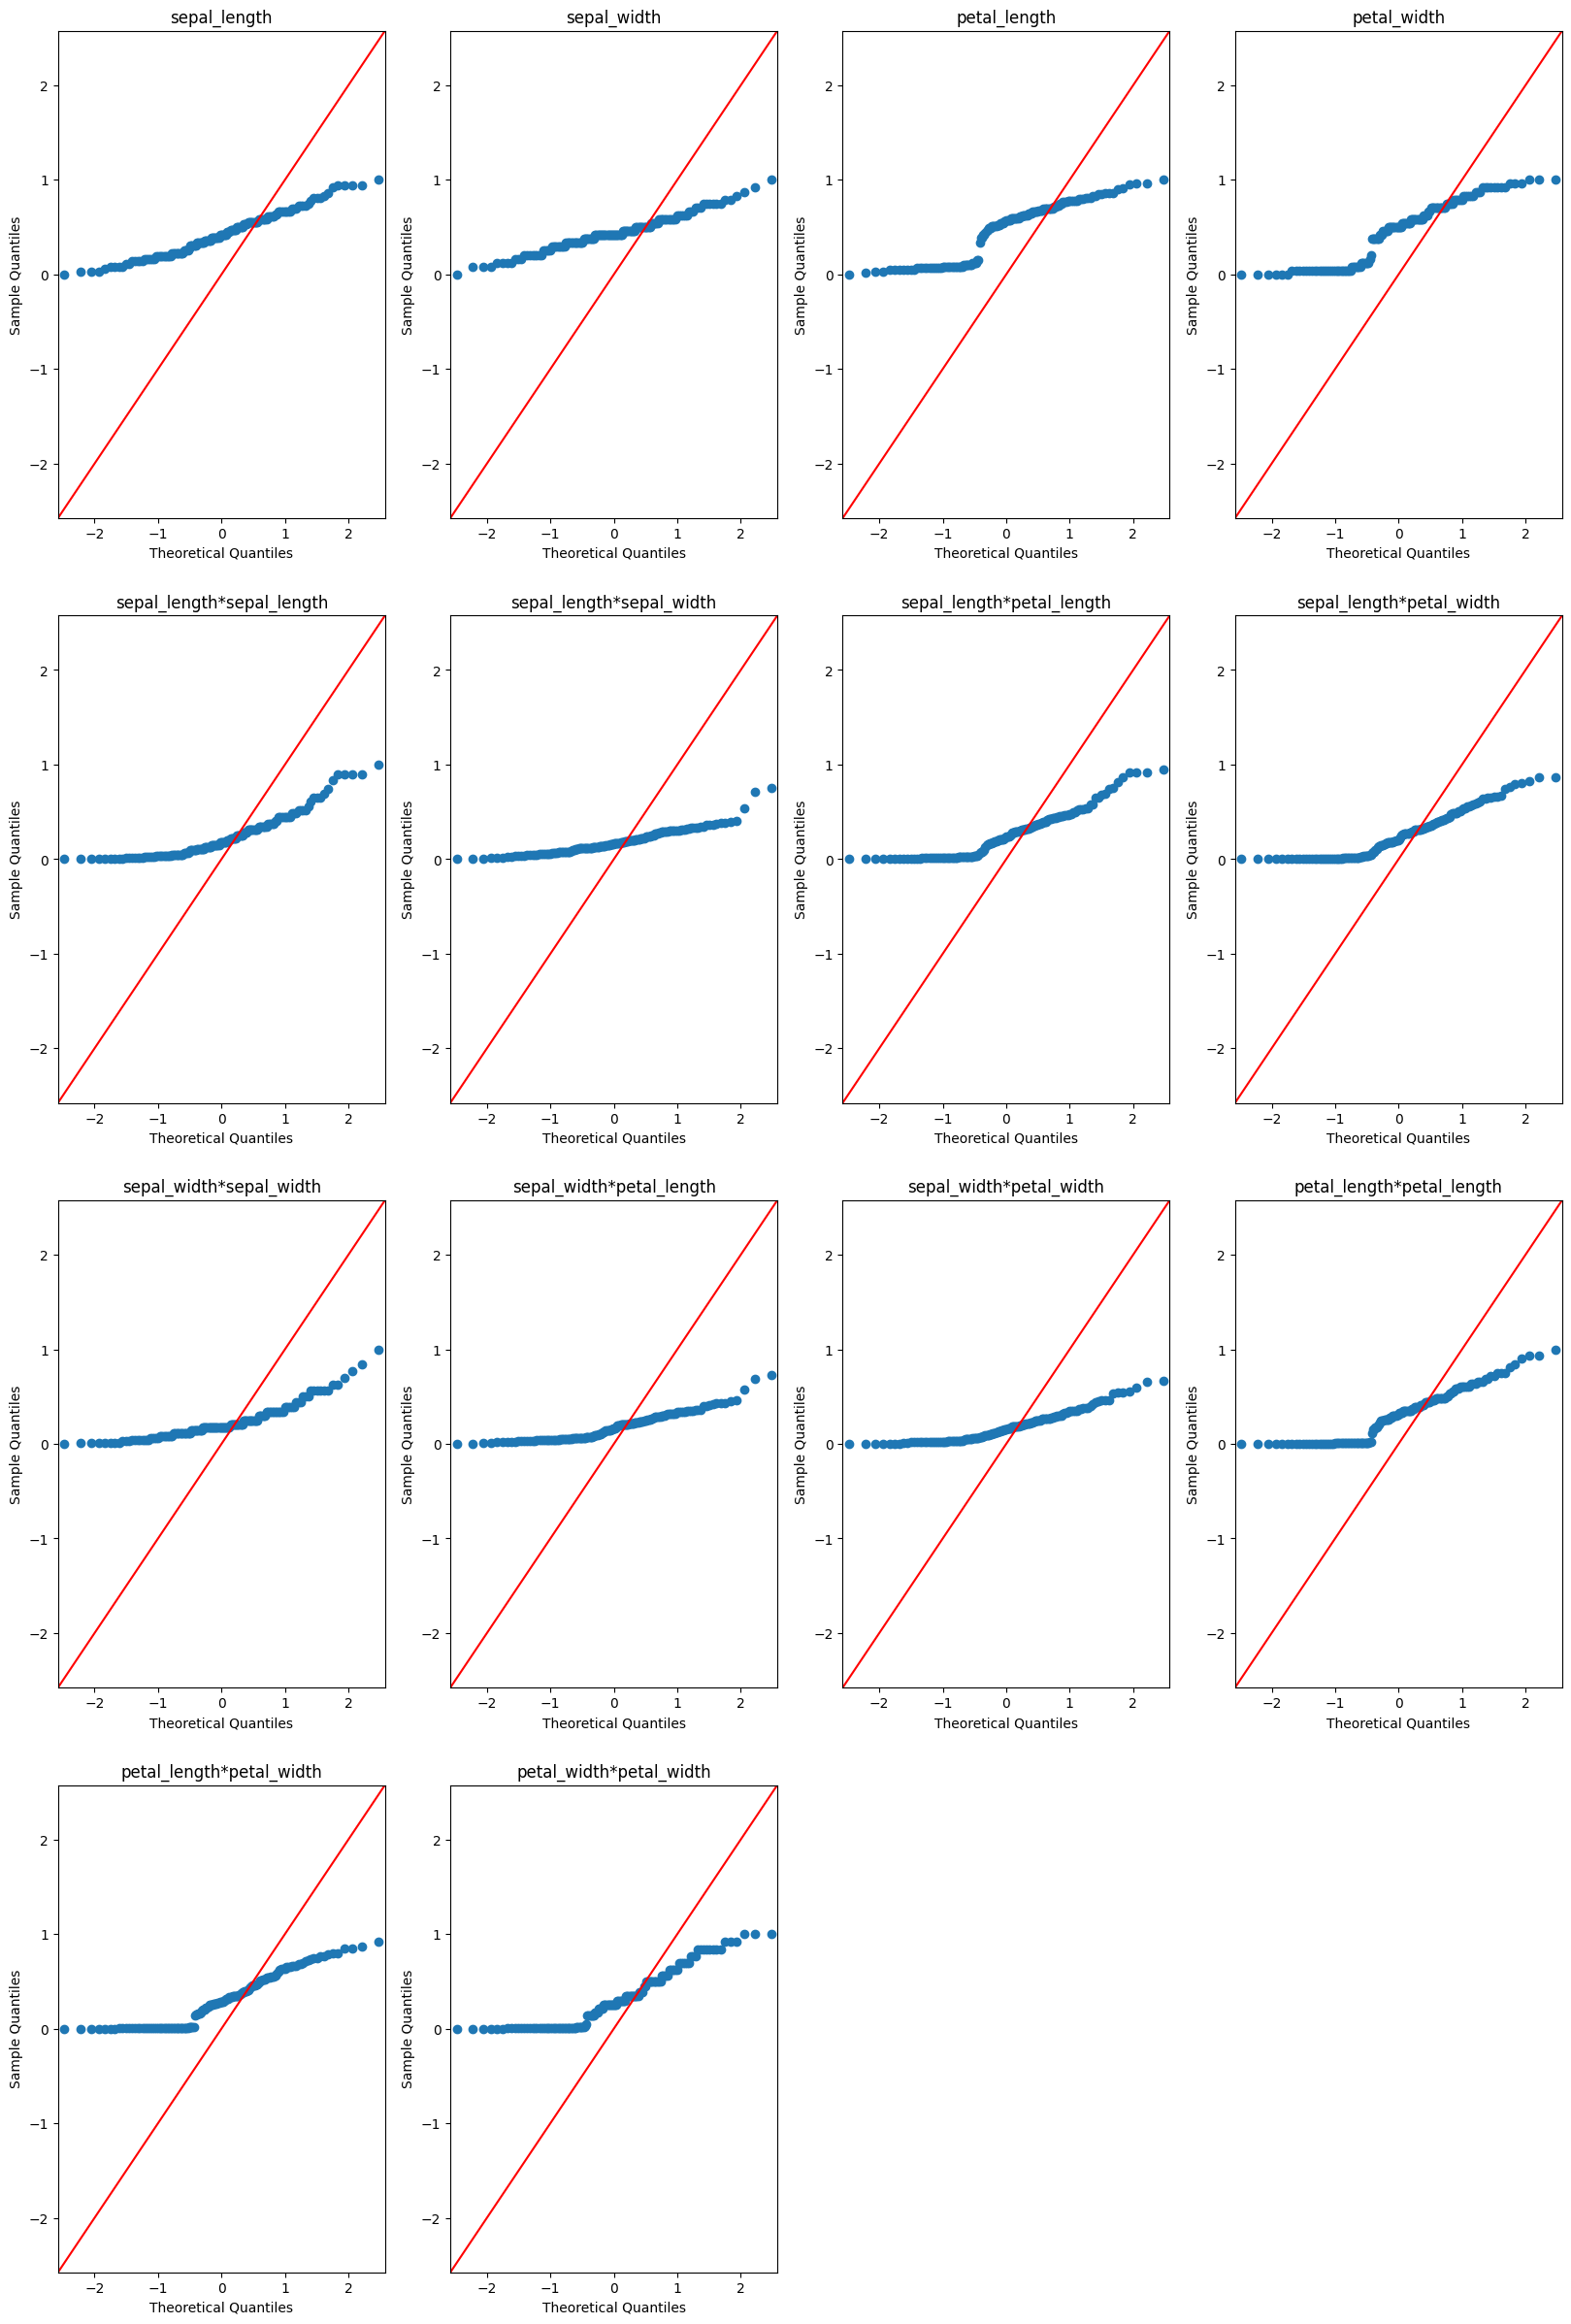

In [ ]:
fig = plt.figure(figsize=(20, 30))

columns = X_norm.columns

for index, col in enumerate(columns, start=1):
  ax = fig.add_subplot(4, ceil(len(columns)/4), index)
  sm.graphics.qqplot(X_norm[col], line='45', ax=ax)
  ax.set_title(col)

In [ ]:
len(X_norm.columns)

14

# **Разбиваем датасет на тестовый и тренировочный**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.5,
                                                    stratify = Y,
                                                    random_state=3)

In [ ]:
y_train.value_counts(normalize=True)

species        
iris-setosa        0.333333
iris-versicolor    0.333333
iris-virginica     0.333333
dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

species        
iris-setosa        0.333333
iris-versicolor    0.333333
iris-virginica     0.333333
dtype: float64

# **Строим модели машинного обучения**

1. Логистическая регрессия или логит-модель (LR)
2. Линейный дискриминантный анализ (LDA)
3. Квадратичный дискриминантный анализ (QDA)
4. Метод k-ближайших соседей (KNN)
5. Классификация и регрессия с помощью деревьев (CART)
6. Наивный байесовский классификатор (NB)
7. Метод опорных векторов (SVM)

## **Модели**

In [ ]:
# Загружаем алгоритмы модели
models = []
models.append(('LR', LogisticRegression(multi_class='multinomial', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# оцениваем модель на каждой итерации
results = []
names = []

for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.960714 (0.060187)
LDA: 0.960714 (0.060187)
QDA: 0.975000 (0.050000)
KNN: 0.960714 (0.060187)
CART: 0.975000 (0.050000)
NB: 0.935714 (0.064484)
SVM: 0.932143 (0.093405)


## **Визуализация**

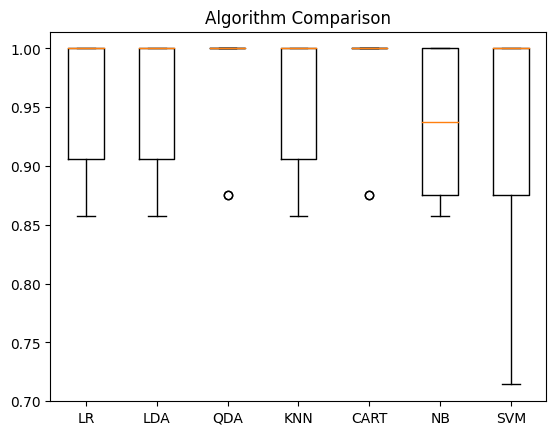

In [ ]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [ ]:
results

[array([0.875     , 1.        , 0.875     , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.85714286]),
 array([1.        , 1.        , 0.875     , 1.        , 0.875     ,
        1.        , 1.        , 1.        , 1.        , 0.85714286]),
 array([0.875, 1.   , 1.   , 1.   , 0.875, 1.   , 1.   , 1.   , 1.   ,
        1.   ]),
 array([0.875     , 1.        , 0.875     , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.85714286]),
 array([0.875, 1.   , 0.875, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   ]),
 array([0.875     , 0.875     , 0.875     , 0.875     , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.85714286]),
 array([1.        , 1.        , 0.875     , 0.875     , 1.        ,
        0.85714286, 1.        , 1.        , 1.        , 0.71428571])]

# **Создаем прогноз**

### **Мультиноминальная логистическая регрессия (LR)**

**Модель**

In [ ]:
log_reg = LogisticRegression(multi_class='multinomial', max_iter=1000)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

**Оценка вероятностей**

In [ ]:
log_reg.predict_proba(X_test)

array([[7.28286480e-01, 2.63234792e-01, 8.47872814e-03],
       [1.20428011e-03, 1.15902989e-01, 8.82892731e-01],
       [5.07377167e-04, 3.27217146e-02, 9.66770908e-01],
       [3.30670967e-02, 4.91121521e-01, 4.75811382e-01],
       [8.38978597e-01, 1.54045443e-01, 6.97595971e-03],
       [1.50121096e-01, 6.74514693e-01, 1.75364211e-01],
       [8.13438406e-02, 5.93142760e-01, 3.25513399e-01],
       [8.88676933e-01, 1.06154725e-01, 5.16834233e-03],
       [3.46299445e-01, 5.81289276e-01, 7.24112783e-02],
       [4.20278842e-02, 5.48105987e-01, 4.09866129e-01],
       [1.87680315e-02, 3.17332469e-01, 6.63899499e-01],
       [2.99270796e-03, 1.47329736e-01, 8.49677556e-01],
       [8.41891625e-01, 1.47078152e-01, 1.10302229e-02],
       [1.97920090e-02, 4.05087548e-01, 5.75120443e-01],
       [8.97129136e-01, 9.77210005e-02, 5.14986311e-03],
       [8.23208678e-01, 1.70244531e-01, 6.54679087e-03],
       [7.03409938e-02, 6.01961067e-01, 3.27697940e-01],
       [1.48410169e-01, 6.97635

**Precision и recall**

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        25
iris-versicolor       0.92      0.88      0.90        25
 iris-virginica       0.88      0.92      0.90        25

       accuracy                           0.93        75
      macro avg       0.93      0.93      0.93        75
   weighted avg       0.93      0.93      0.93        75



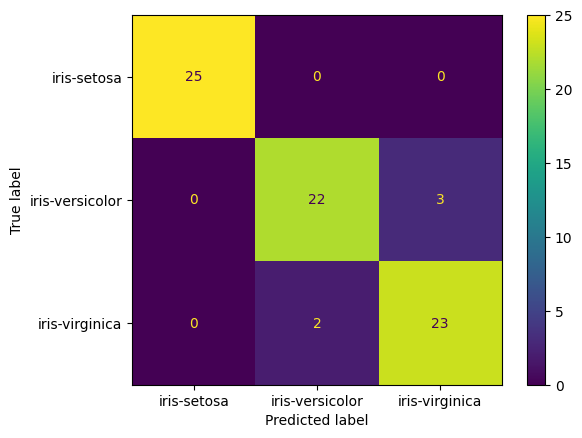

In [ ]:
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()

### **Линейный дискриминантный анализ (LDA)**

**Модель**

In [ ]:
LDA = LinearDiscriminantAnalysis()

LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

**Precision и recall**

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        25
iris-versicolor       0.96      0.92      0.94        25
 iris-virginica       0.92      0.96      0.94        25

       accuracy                           0.96        75
      macro avg       0.96      0.96      0.96        75
   weighted avg       0.96      0.96      0.96        75



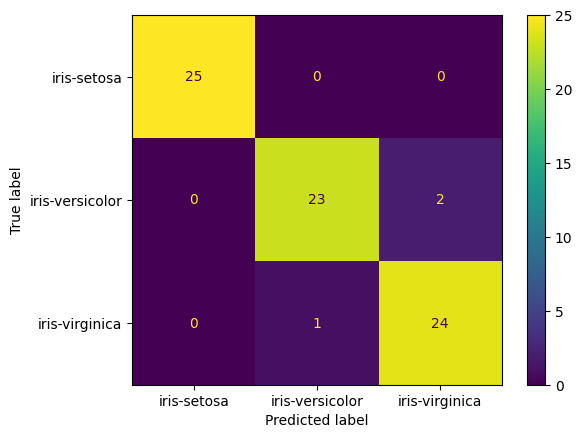

In [ ]:
y_pred = LDA.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=LDA.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,     display_labels=LDA.classes_)
disp.plot()

## **Квадратичный дискриминантный анализ (QDA)**

**Модель**

In [ ]:
QDA = QuadraticDiscriminantAnalysis()

QDA.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

**Precision и recall**

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        25
iris-versicolor       1.00      0.88      0.94        25
 iris-virginica       0.89      1.00      0.94        25

       accuracy                           0.96        75
      macro avg       0.96      0.96      0.96        75
   weighted avg       0.96      0.96      0.96        75



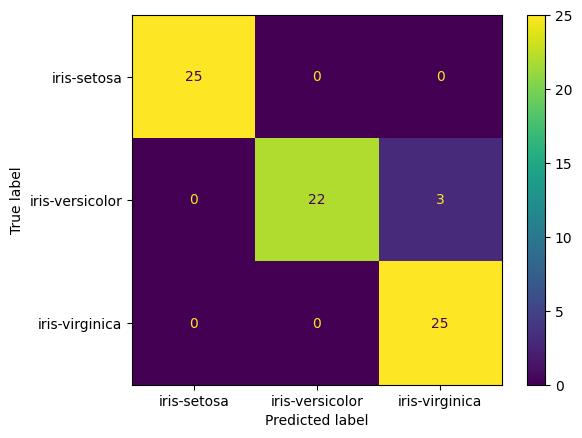

In [ ]:
y_pred = QDA.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=QDA.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,     display_labels=QDA.classes_)
disp.plot()

## **Метод k-ближайших соседей (KNN)**

**Выбираем оптимальное количество ближайших соседей**

In [ ]:
dict_knn = {'K':[],
            'acc_train':[],
            'acc_test':[]}
K = [1, 3, 5, 9, 14, 17]

for k in K:
  nbrs = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  cv_results = cross_validate(nbrs, X_train, y_train, cv=10, scoring = 'accuracy', return_train_score=True)
  dict_knn['K'].append(k)
  dict_knn['acc_train'].append((cv_results['train_score'].mean()))
  dict_knn['acc_test'].append((cv_results['test_score'].mean()))
  print(dict_knn)

{'K': [1], 'acc_train': [1.0], 'acc_test': [0.9482142857142858]}
{'K': [1, 3], 'acc_train': [1.0, 0.9629938542581211], 'acc_test': [0.9482142857142858, 0.9482142857142858]}
{'K': [1, 3, 5], 'acc_train': [1.0, 0.9629938542581211, 0.9733538191395962], 'acc_test': [0.9482142857142858, 0.9482142857142858, 0.9625]}
{'K': [1, 3, 5, 9], 'acc_train': [1.0, 0.9629938542581211, 0.9733538191395962, 0.9733538191395962], 'acc_test': [0.9482142857142858, 0.9482142857142858, 0.9625, 0.9625]}
{'K': [1, 3, 5, 9, 14], 'acc_train': [1.0, 0.9629938542581211, 0.9733538191395962, 0.9733538191395962, 0.9733538191395962], 'acc_test': [0.9482142857142858, 0.9482142857142858, 0.9625, 0.9625, 0.975]}
{'K': [1, 3, 5, 9, 14, 17], 'acc_train': [1.0, 0.9629938542581211, 0.9733538191395962, 0.9733538191395962, 0.9733538191395962, 0.9718612818261633], 'acc_test': [0.9482142857142858, 0.9482142857142858, 0.9625, 0.9625, 0.975, 0.975]}


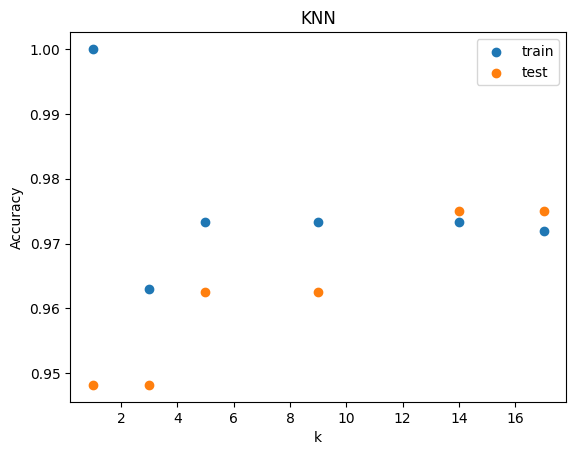

In [ ]:
plt.scatter(dict_knn['K'], dict_knn['acc_train'], label = 'train')
plt.scatter(dict_knn['K'], dict_knn['acc_test'], label = 'test')
plt.title('KNN')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
max_acc = max(dict_knn['acc_test'])

index_max_acc = dict_knn['acc_test'].index(max_acc)

best_number_of_K = dict_knn['K'][index_max_acc]

best_number_of_K

14

**Модель**

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=14, metric='euclidean')

KNN.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=14)

**Precision и recall**

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        25
iris-versicolor       0.92      0.92      0.92        25
 iris-virginica       0.92      0.92      0.92        25

       accuracy                           0.95        75
      macro avg       0.95      0.95      0.95        75
   weighted avg       0.95      0.95      0.95        75



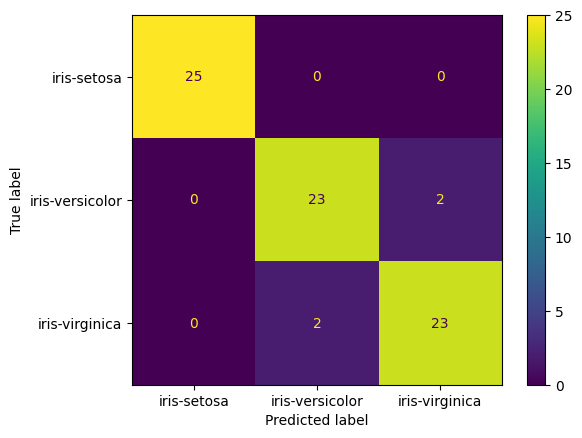

In [ ]:
y_pred = KNN.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,     display_labels=KNN.classes_)
disp.plot()

## **Классификация и регрессия с помощью деревьев (CART)**

**Модель**

In [ ]:
DTC = DecisionTreeClassifier()

DTC.fit(X_train, y_train)

DecisionTreeClassifier()

**Precision и recall**

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        25
iris-versicolor       1.00      0.88      0.94        25
 iris-virginica       0.89      1.00      0.94        25

       accuracy                           0.96        75
      macro avg       0.96      0.96      0.96        75
   weighted avg       0.96      0.96      0.96        75



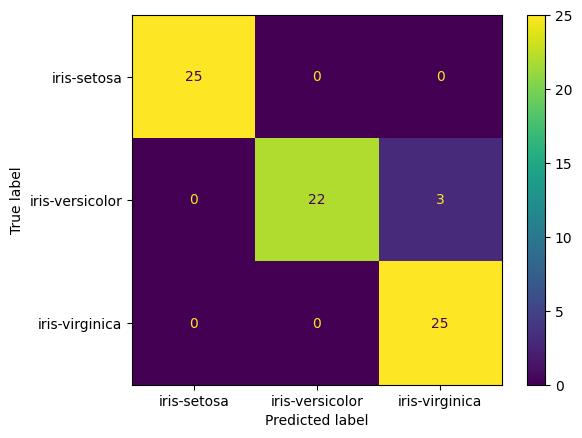

In [ ]:
y_pred = DTC.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=DTC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DTC.classes_)
disp.plot()

## **Наивный байесовский классификатор (NB)**

**Модель**

In [ ]:
GNB = GaussianNB()

GNB.fit(X_train, y_train)

GaussianNB()

**Precision и recall**

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        25
iris-versicolor       0.96      0.88      0.92        25
 iris-virginica       0.89      0.96      0.92        25

       accuracy                           0.95        75
      macro avg       0.95      0.95      0.95        75
   weighted avg       0.95      0.95      0.95        75



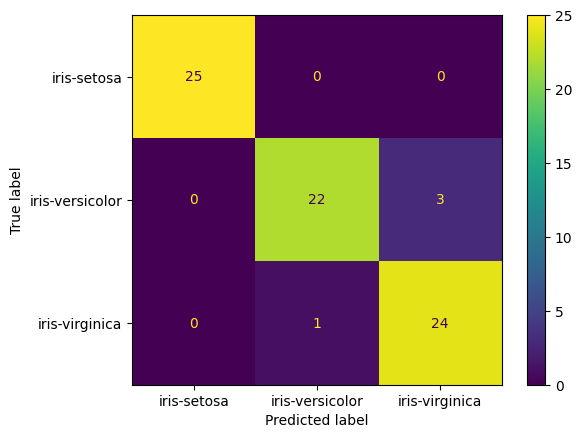

In [ ]:
y_pred = GNB.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=GNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot()

## **Метод опорных векторов (SVM)**

**Модель**

In [ ]:
SVM = SVC(gamma='auto')

SVM.fit(X_train, y_train)

SVC(gamma='auto')

**Precision и recall**

                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        25
iris-versicolor       0.92      0.92      0.92        25
 iris-virginica       0.92      0.92      0.92        25

       accuracy                           0.95        75
      macro avg       0.95      0.95      0.95        75
   weighted avg       0.95      0.95      0.95        75



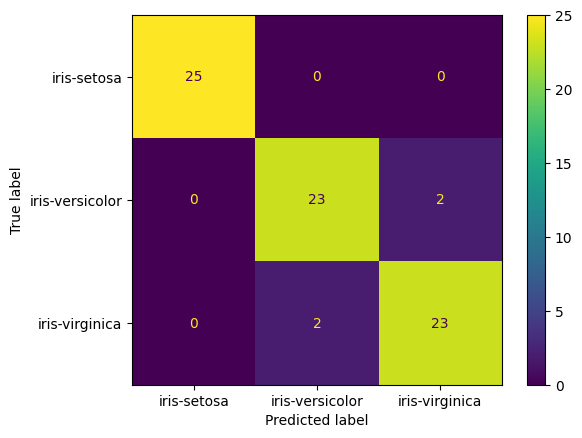

In [ ]:
y_pred = SVM.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM.classes_)
disp.plot()